#### importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [3]:
data = pd.read_csv('appdata10.csv')

#### EDA

In [4]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date
0,235136,27-12-2012 02:14,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaN
1,333588,02-12-2012 01:16,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaN
2,254414,19-03-2013 19:19,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,1,0,NaN
3,234192,05-07-2013 16:08,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,05-07-2013 16:11
4,51549,26-02-2013 18:50,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,26-02-2013 18:56


In [6]:
data.describe()

,user,dayofweek,age,numscreens,minigame,liked,used_premium_feature,enrolled
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.165000,0.172020,0.621480
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.371184,0.377402,0.485023
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.hour

0         02:00:00
1         01:00:00
2         19:00:00
3         16:00:00
4         18:00:00
           ...    
49995     13:00:00
49996     00:00:00
49997     22:00:00
49998     12:00:00
49999     01:00:00
Name: hour, Length: 50000, dtype: object

#### Data Cleaning

In [22]:
data.hour = data.hour.str.slice(1,3).astype(int) # converting the hour column to integer

In [23]:
data2 = data.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled']) #creating a copy of the dataset and dropping the irrelevance columns
data2

,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,1,0
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,0,1
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


### Getting familiar with the data 
# Histogram

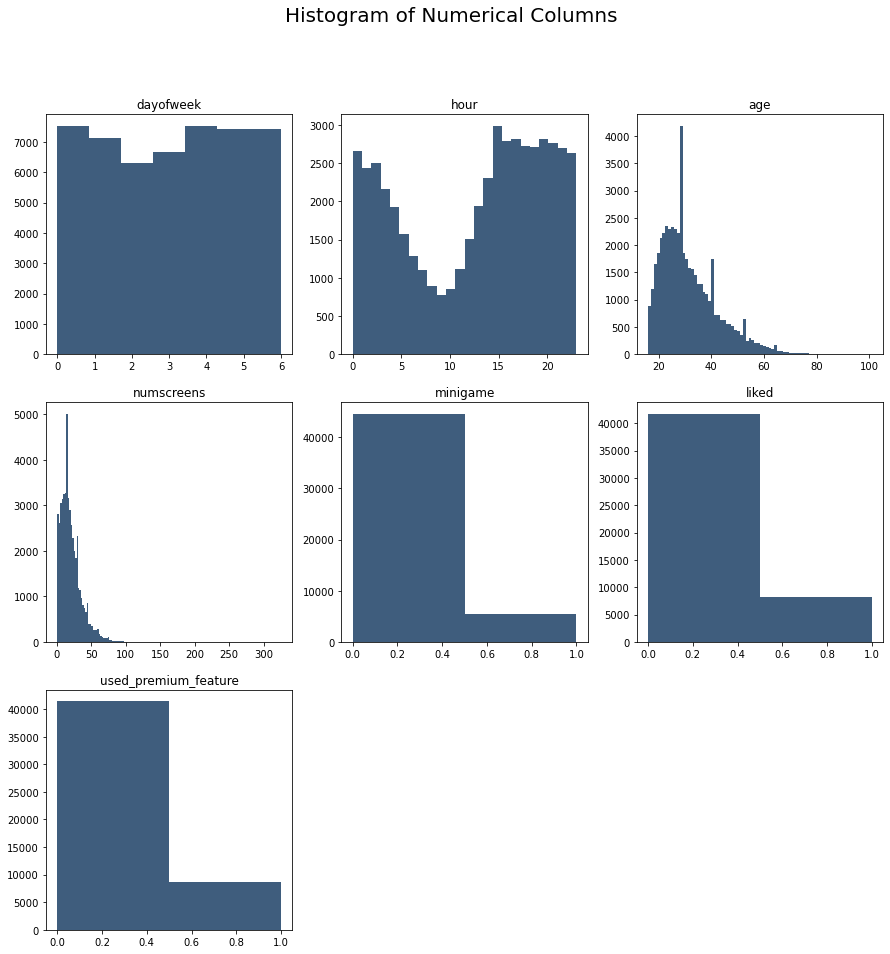

In [24]:

plt.figure(figsize=(15,15))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(1, data2.shape[1]+1): #columns to be plotted
    plt.subplot(3,3,i) # creating a 3 by 3 framed plot
    f = plt.gca() # clean up everthing, creats the field
    f.set_title(data2.columns.values[i - 1]) # namimg frames
    
    vals = np.size(data2.iloc[:, i - 1].unique()) #sum of unique values in each column
    
    plt.hist(data2.iloc[:, i - 1], bins = vals, color = '#3F5D7D') #plotting the histogram

### Correlation

<AxesSubplot:title={'center':'correlation with response variable'}>

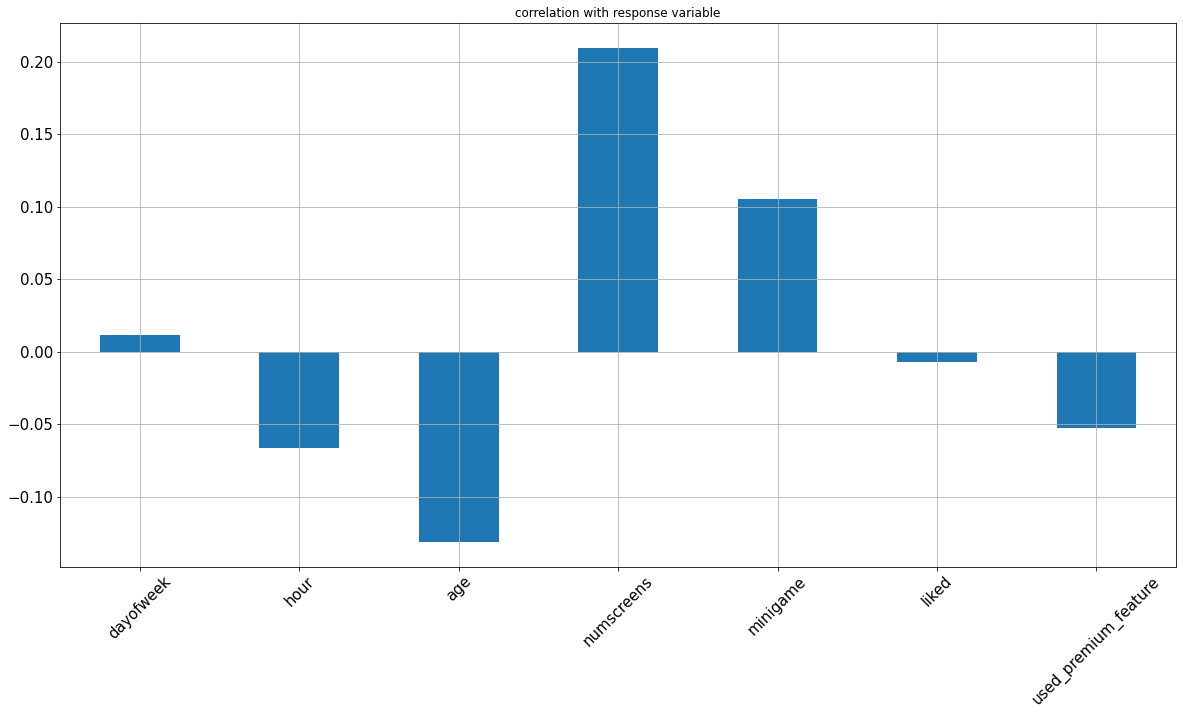

In [25]:
data2.corrwith(data.enrolled).plot.bar(figsize=(20,10),
                                      title = 'correlation with response variable',
                                      fontsize = 15, rot = 45,
                                      grid = True) #returns a numerical list of correlation between all the fields in this dataframe, with a list given as an argument

#### Correlation Matrix

<AxesSubplot:>

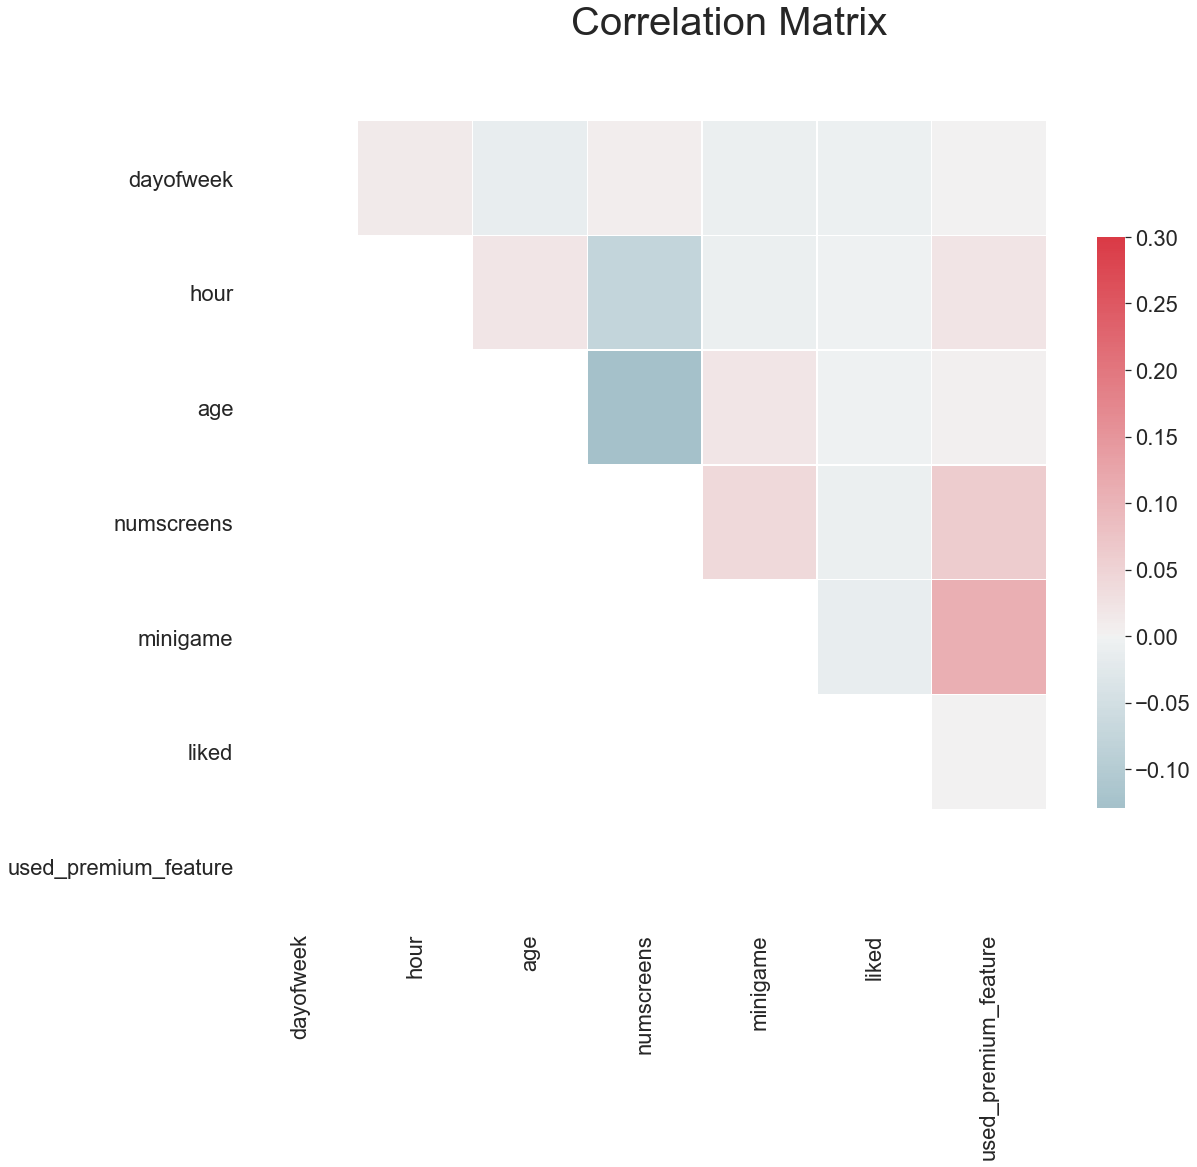

In [32]:
sns.set(style = "white", font_scale=2)

corr = data2.corr() # compute the correlation matrix

mask = np.zeros_like(corr, dtype=np.bool) # generate a mask of upper triangle
mask[np.tril_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18,15))
f.suptitle("Correlation Matrix", fontsize = 40)

cmap = sns.diverging_palette(220,10, as_cmap=True) # color mapping

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.7})

### Feature Engineering - Response

In [33]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
liked                    int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
dtype: object

In [34]:
# converting first_open, enrolled date to time data type
data['first_open'] = [parser.parse(row_data) for row_data in data['first_open']]
data['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in data['enrolled_date']]
data.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
liked                            int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
dtype: object

In [ ]:
# finding the difference in first open and enrolled time
data['difference'] = (data.enrolled_date - data.first_open).astype('timedelta64[h]')

In [37]:
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled,enrolled_date,difference
0,235136,2012-12-27 02:14:00,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0,NaT,NaN
1,333588,2012-02-12 01:16:00,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,NaT,NaN
2,254414,2013-03-19 19:19:00,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0,NaT,NaN
3,234192,2013-05-07 16:08:00,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1,2013-05-07 16:11:00,0.0
4,51549,2013-02-26 18:50:00,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1,2013-02-26 18:56:00,0.0


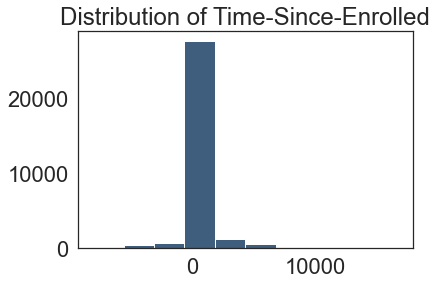

In [38]:
plt.hist(data['difference'].dropna(), color='#3F5D7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

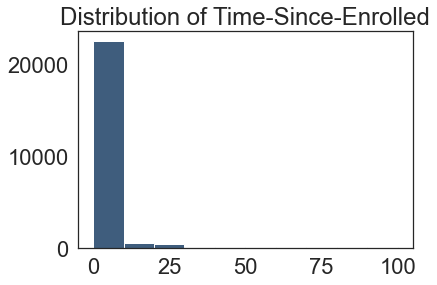

In [39]:
plt.hist(data['difference'].dropna(), color='#3F5D7D', range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [40]:
# making a cut off time on 48hrs 
data.loc[data.difference > 48, 'enrolled'] = 0 
data = data.drop(columns = ['difference', 'enrolled_date','first_open']) # dropping columns which would not be needed any more

In [41]:
data.head()

,user,dayofweek,hour,age,screen_list,numscreens,minigame,liked,used_premium_feature,enrolled
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,1,0
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,0,1
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,1,0,1


#### Feature Engineering - Screen

In [42]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [43]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [44]:
data['screen_list'] = data.screen_list.astype(str) + ','
    
for sc in top_screens:
    data[sc] = data.screen_list.str.contains(sc).astype(int)
    data['screen_list'] = data.screen_list.str.replace(sc+",","")
    
data['other'] = data.screen_list.str.count(",")
data = data.drop(columns =['screen_list'])

data.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,Loan2,...,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,other
0,235136,3,2,23,15,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,7
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,6
4,51549,1,18,31,32,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,10


#### Funnels
Group of screens that belong to the same set, which would be very correlated

In [46]:
# identifying screens of similar types or same funnel

# savings screens
savings_screens = ["Saving1",
                  "Saving2",
                  "Saving2Amount",
                  "Saving4",
                  "Saving5",
                  "Saving6",
                  "Saving7",
                  "Saving8",
                  "Saving9",
                  "Saving10"]
data['savingscount'] = data[savings_screens].sum(axis=1)
data = data.drop(columns = savings_screens)

In [47]:
# credit mondering screens
cm_screens = ["Credit1",
             "Credit2",
             "Credit3",
             "Credit3Container",
             "Credit3Dashboard"]
data['CMCount'] = data[cm_screens].sum(axis=1)
data = data.drop(columns = cm_screens)

In [48]:
# credit card screens
cc_screens = ["CC1",
             "CC1Category",
             "CC3"]
data['CCCount'] = data[cc_screens].sum(axis=1)
data = data.drop(columns = cc_screens)

In [50]:
# loan screen
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
data['LoansCount'] = data[loan_screens].sum(axis=1)
data = data.drop(columns = loan_screens)

In [51]:
data.head()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,0,1,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,1,0,1,0,...,0,0,0,0,0,10,0,2,0,1


In [52]:
data.describe()

,user,dayofweek,hour,age,numscreens,minigame,liked,used_premium_feature,enrolled,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,savingscount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.165000,0.172020,0.509000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.371184,0.377402,0.499924,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [53]:
data.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame', 'liked',
       'used_premium_feature', 'enrolled', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'other',
       'savingscount', 'CMCount', 'CCCount', 'LoansCount'],
      dtype='object')

In [54]:
# saving the dataset to a csv
data.to_csv('new_appdata10.csv', index=False)